In [1]:
from IPython.display import display, HTML
display(HTML("<style>:root { --jp-notebook-max-width: 100% !important; }</style>"))

In [2]:
%load_ext autoreload
%autoreload 2
import bnpm

make dF/F

In [5]:
F, Fneu, iscell, ops, spks, stat = bnpm.ca2p_preprocessing.import_s2p(dir_s2p=r'/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/s2p/20230430/plane0/')

In [6]:
Fs = ops['fs']

In [13]:
dFoF_params = {
    "channelOffset_correction": 0,
    "percentile_baseline": 30,
    "neuropil_fraction": 0.7,
    "rolling_percentile_window": Fs*15*60,
}

In [7]:
dFoF , dF , F_neuSub , F_baseline_roll = bnpm.ca2p_preprocessing.make_dFoF(
    F,
    Fneu=Fneu,
    roll_centered=True,
    roll_stride=1,
    roll_interpolation='linear',
    multicore_pref=True,
    verbose=True,
    **dFoF_params,
)

100%|███████████████████████████████████████████████████████████████████| 36/36 [00:32<00:00,  1.12it/s]


Calculated dFoF. Total elapsed time: 37.97 seconds


ROIs excluded: 1064 / 3352
ROIs included: 2288 / 3352


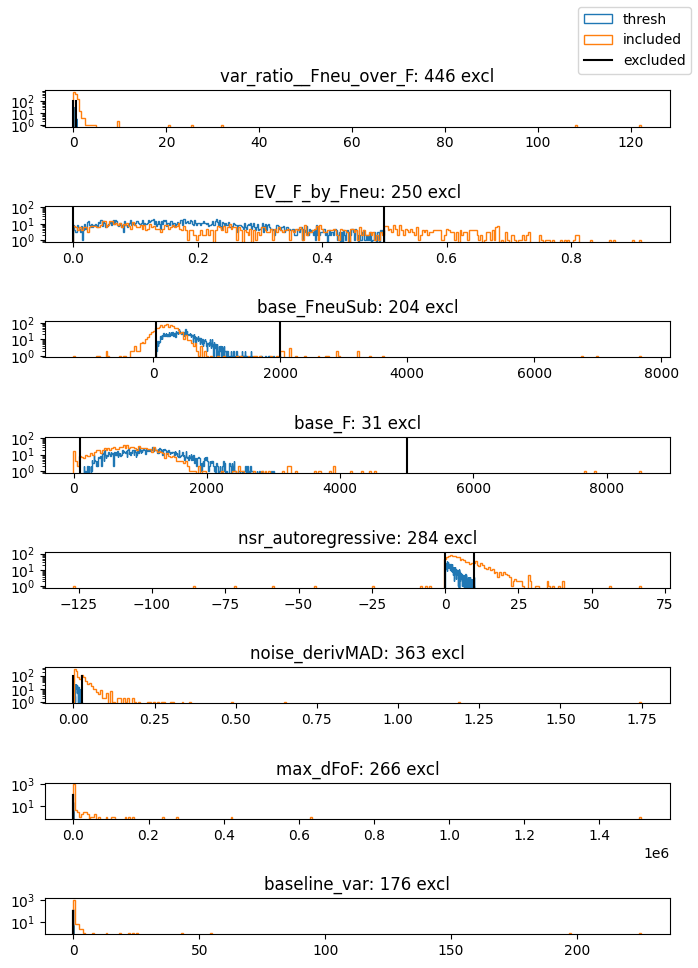

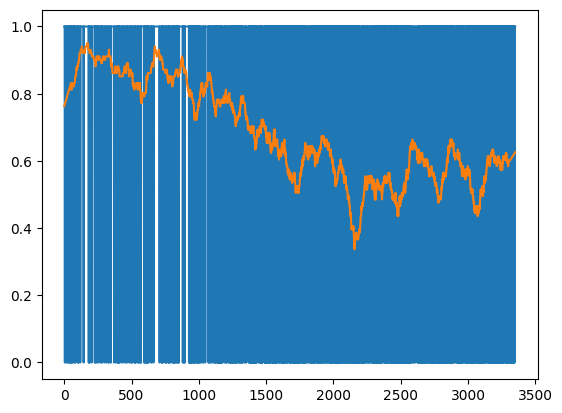

In [18]:
%matplotlib inline

thresh = {
    'var_ratio__Fneu_over_F': (0, 0.5),
    'EV__F_by_Fneu': (0, 0.5),
    'base_FneuSub': (50, 2000),
    'base_F': (100, 5000),
    'nsr_autoregressive': (0, 10),
    'noise_derivMAD': (0, 0.025),
    'max_dFoF': (0.75, 40),
    'baseline_var': (0, 0.025),
}
# thresh = {
#     'var_ratio__Fneu_over_F': np.inf,
#     'EV__F_by_Fneu': np.inf,
#     'base_FneuSub': -np.inf,
#     'base_F': -np.inf,
#     'nsr_autoregressive': np.inf,
#     'noise_derivMAD': np.inf,
#     'max_dFoF': np.inf,
#     'baseline_var': np.inf,
# }
    
tqm, iscell_tqm = bnpm.ca2p_preprocessing.trace_quality_metrics(
    F=F,
    Fneu=Fneu,
    dFoF=dFoF,
    F_neuSub=F_neuSub,
    F_baseline_roll=F_baseline_roll,
    percentile_baseline=dFoF_params['percentile_baseline'],
    Fs=Fs,
    plot_pref=True,
    thresh=thresh,
    device='cpu',
)

# idxROI_tqm_toInclude = iscell_tqm
# idxROI_tqm_toExclude = ~iscell_tqm

100%|███████████████████████████████████████████████████████████████████| 36/36 [00:33<00:00,  1.08it/s]


Calculated dFoF. Total elapsed time: 43.21 seconds
ROIs excluded: 1064 / 3352
ROIs included: 2288 / 3352


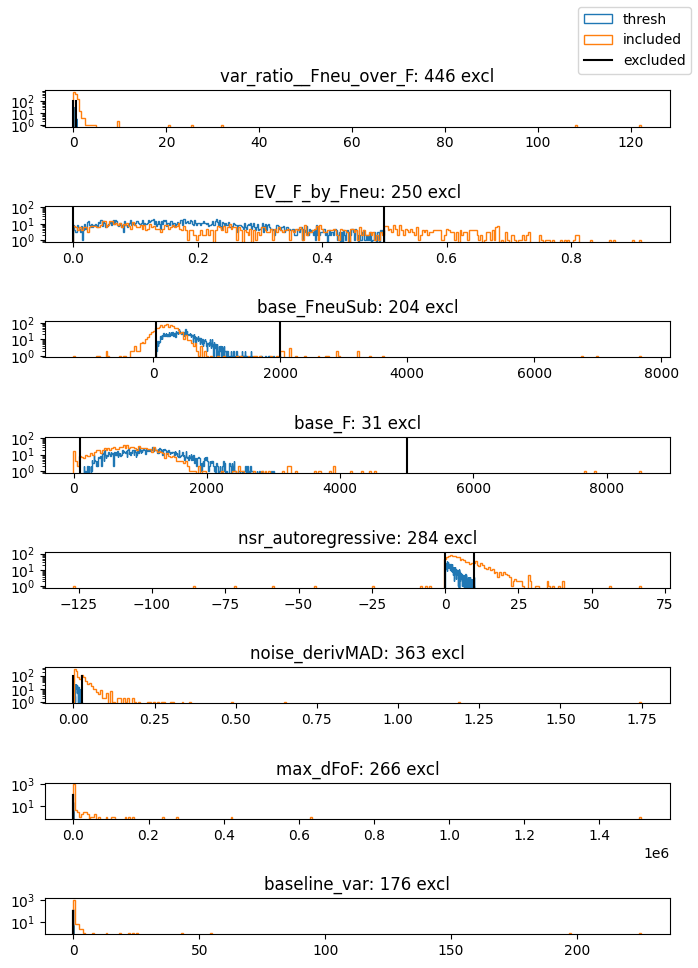

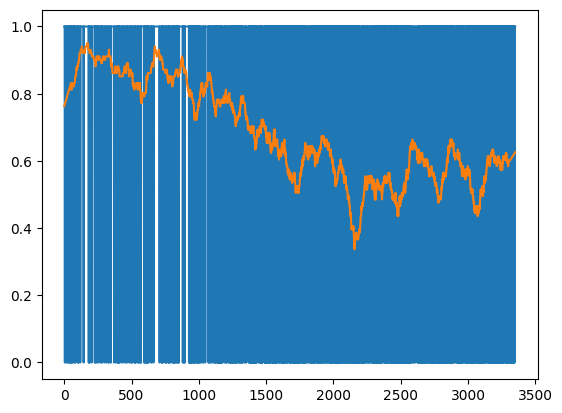

In [20]:
import bnpm

dir_s2p = r'/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/s2p/20230430/plane0/'

F, Fneu, iscell, ops, spks, stat = bnpm.ca2p_preprocessing.import_s2p(dir_s2p=dir_s2p)

Fs = ops['fs']

dFoF_params = {
    "channelOffset_correction": 0,
    "percentile_baseline": 30,
    "neuropil_fraction": 0.7,
    "rolling_percentile_window": Fs*15*60,
}
# dFoF_params = params['dFoF_params']

dFoF , dF , F_neuSub , F_baseline_roll = bnpm.ca2p_preprocessing.make_dFoF(
    F,
    Fneu=Fneu,
    roll_centered=True,
    roll_stride=1,
    roll_interpolation='linear',
    multicore_pref=True,
    verbose=True,
    **dFoF_params,
)

%matplotlib inline

thresh = {
    'var_ratio__Fneu_over_F': (0, 0.5),
    'EV__F_by_Fneu': (0, 0.5),
    'base_FneuSub': (50, 2000),
    'base_F': (100, 5000),
    'nsr_autoregressive': (0, 10),
    'noise_derivMAD': (0, 0.025),
    'max_dFoF': (0.75, 40),
    'baseline_var': (0, 0.025),
}
# thresh = {
#     'var_ratio__Fneu_over_F': np.inf,
#     'EV__F_by_Fneu': np.inf,
#     'base_FneuSub': -np.inf,
#     'base_F': -np.inf,
#     'nsr_autoregressive': np.inf,
#     'noise_derivMAD': np.inf,
#     'max_dFoF': np.inf,
#     'baseline_var': np.inf,
# }
# thresh = params['thresh']
    
tqm, iscell_tqm = bnpm.ca2p_preprocessing.trace_quality_metrics(
    F=F,
    Fneu=Fneu,
    dFoF=dFoF,
    F_neuSub=F_neuSub,
    F_baseline_roll=F_baseline_roll,
    percentile_baseline=dFoF_params['percentile_baseline'],
    Fs=Fs,
    plot_pref=True,
    thresh=thresh,
    device='cpu',
)

# idxROI_tqm_toInclude = iscell_tqm
# idxROI_tqm_toExclude = ~iscell_tqm